In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C://Users//Dell_USA//Downloads//seattle-weather.csv')

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
from sklearn.preprocessing import LabelEncoder

df['weather']=LabelEncoder().fit_transform(df['weather'])

In [10]:
new_df=df.drop(['date'],axis=1)

In [11]:
result = df.copy()
max_value = df['precipitation'].max()
min_value = df['precipitation'].min()
result['precipitation'] = (df['precipitation'] - min_value) / (max_value - min_value)
max_value = df['temp_max'].max()
min_value = df['temp_max'].min()
result['temp_max'] = (df['temp_max'] - min_value) / (max_value - min_value)
max_value = df['temp_min'].max()
min_value = df['temp_min'].min()
result['temp_min'] = (df['temp_min'] - min_value) / (max_value - min_value)
max_value = df['wind'].max()
min_value = df['wind'].min()
result['wind'] = (df['wind'] - min_value) / (max_value - min_value)

<Axes: >

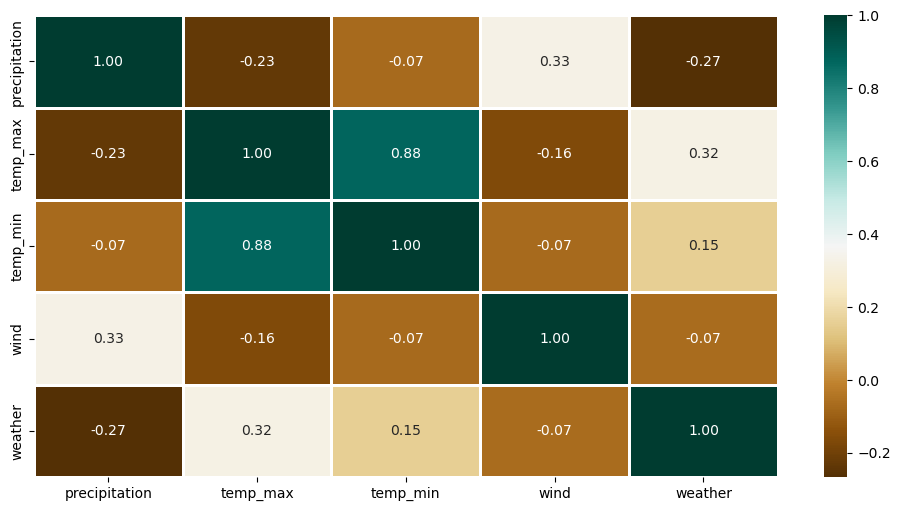

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

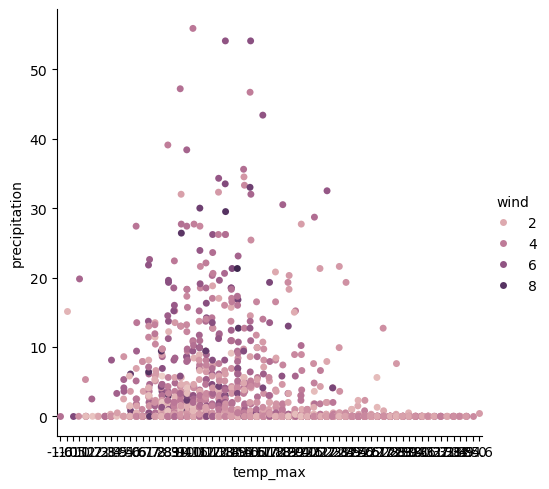

In [13]:
sns.catplot(x="temp_max", y="precipitation",hue="wind", data=df)

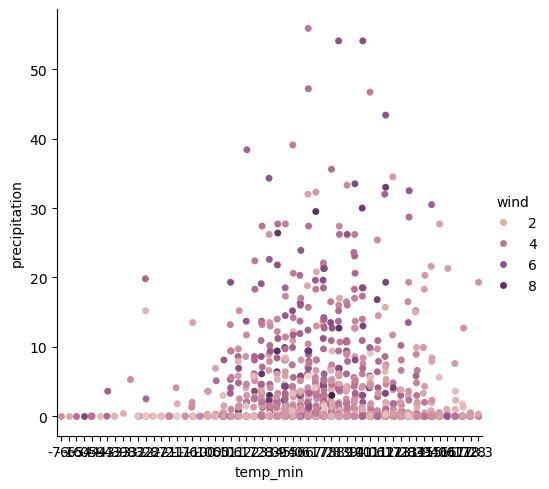

In [14]:
sns.catplot(x="temp_min", y="precipitation",hue="wind", data=df)

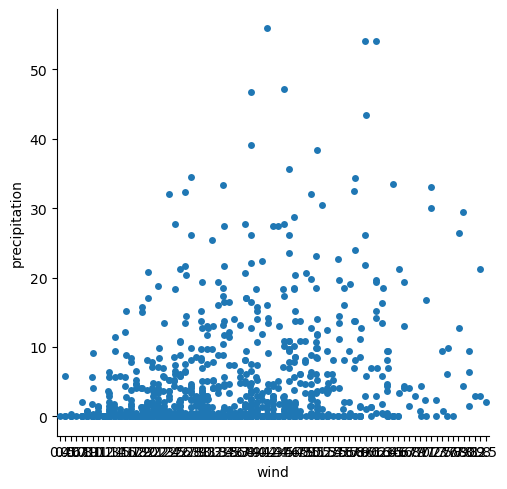

In [15]:
sns.catplot(x="wind", y="precipitation", data=df)

In [29]:
from sklearn.model_selection import train_test_split
features=["precipitation", "temp_max", "temp_min","wind"]
X=df[features]
y=df.weather
train_X, test_X, train_y, test_y = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state = 0)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
r2_score = model1.score(train_X,train_y)
print(r2_score*100,'%')
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

98.90429692385948 %
Mean Absolute Error: 0.815700


In [36]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
r2_score = model2.score(test_X,pred1)
print(r2_score*100,'%')
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))

56.659585732155016 %
Mean Absolute Error: 0.757395


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print(metrics.accuracy_score(test_y, pred1))
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

0.7064846416382252
Mean Absolute Error: 0.815700
